In [ ]:
import pandas as pd
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, AveragePooling2D, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras_preprocessing import image
from google.colab import files
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir='/content/drive/MyDrive/Bangkit/artnesia/modelling/'

In [ ]:
%cd '/content/drive/MyDrive/Bangkit/artnesia/modelling/'

/content/drive/MyDrive/Bangkit/artnesia/modelling


In [ ]:
ls

ArtnesiaTfLiteModelling.ipynb  dataset/  test/  train/  val/


In [ ]:
def list_files(startpath):
  for root, dirs, files in os.walk(startpath):
    level = root.replace(startpath, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subident = ' ' * 4 * (level + 1)
list_files(base_dir)

/
dataset/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_bali/
    batik_cendrawasih/
train/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
val/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
test/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/


In [ ]:
label = list()
counter = list()

for x in os.listdir(os.path.join(base_dir, 'dataset')):
  print(x)
  label.append(x)
  i = 0
  for y in os.listdir(os.path.join(base_dir, 'dataset/' + str(x))):
    i = i+1
  print(i)
  counter.append(i)

angklung
250
blangkon
250
ganongan
250
noken
250
wayang_petruk
250
keris
250
sasando
156
wayang_semar
250
wayang_bagong
250
wayang_gareng
250
batik_bali
250
batik_cendrawasih
249


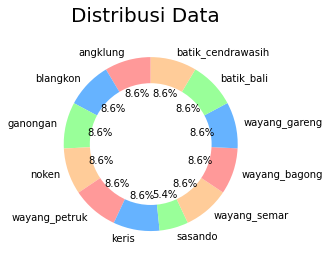

In [ ]:
import matplotlib.pyplot as plt
# Pie chart
labels = label
sizes = counter
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.suptitle('Distribusi Data', fontsize=20)
fig.gca().add_artist(centre_circle)

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('dataset', output= base_dir, seed=1337, ratio=(.8, .19, .01), group_prefix=None)

Copying files: 2406 files [23:40,  1.69 files/s]


In [ ]:
list_files(base_dir)

/
dataset/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
train/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
val/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
test/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/


# Preprocessing

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                              height_shift_range=0.2,
                              rescale=1./255,
                              shear_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [ ]:
import os
from PIL import Image
folder_path = r'/content/drive/MyDrive/Bangkit/artnesia/modelling/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [ ]:
import os
from PIL import Image
folder_path = r'/content/drive/MyDrive/Bangkit/artnesia/modelling/test'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [ ]:
import os
from PIL import Image
folder_path = r'/content/drive/MyDrive/Bangkit/artnesia/modelling/val'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

TRAINING_DIR = '/content/drive/MyDrive/Bangkit/artnesia/modelling/train'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = '/content/drive/MyDrive/Bangkit/artnesia/modelling/test'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)


VALIDATION_DIR = '/content/drive/MyDrive/Bangkit/artnesia/modelling/val'
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=True
)

Found 2324 images belonging to 12 classes.
Found 36 images belonging to 12 classes.
Found 545 images belonging to 12 classes.


In [ ]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 2324 files belonging to 12 classes.


In [ ]:
class_names = train_dataset.class_names

print(class_names)

['angklung', 'batik_bali', 'batik_cendrawasih', 'blangkon', 'ganongan', 'keris', 'noken', 'sasando', 'wayang_bagong', 'wayang_gareng', 'wayang_petruk', 'wayang_semar']


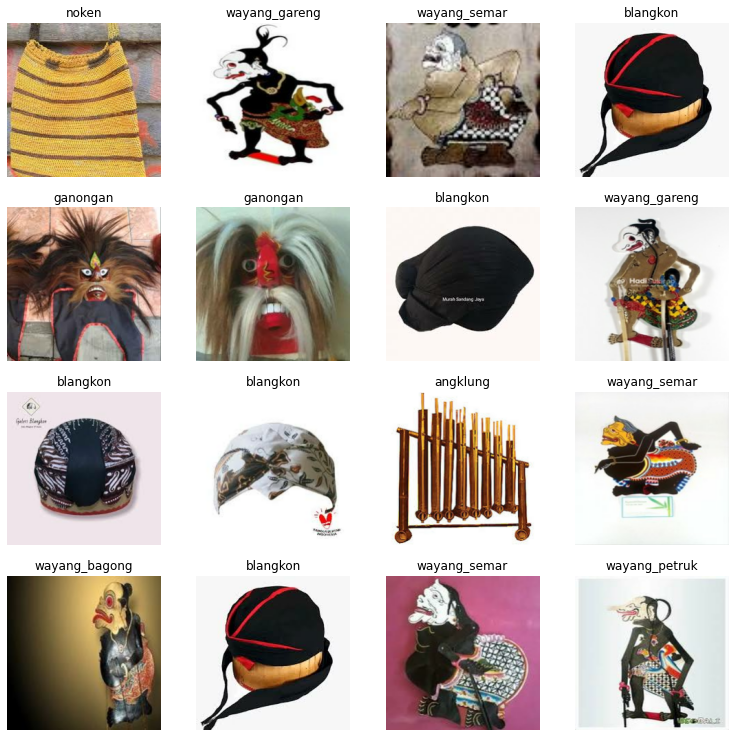

In [ ]:
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Model 1
model pertama menggabungkan minimal 2 kmbinassi pretrained architectures yang berbeda sebagai ekstraksi fitur.
Training pembobotan dilakukan pada layer eksperiment dengan menerapkan improvisasi training.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Using dropouts
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    verbose = 1,
                    validation_steps=len(val_generator))

Epoch 1/10
73/73 [==============================] - 43s 542ms/step - loss: 2.4453 - accuracy: 0.1416 - val_loss: 2.1970 - val_accuracy: 0.1982
Epoch 2/10
73/73 [==============================] - 46s 631ms/step - loss: 2.1339 - accuracy: 0.2367 - val_loss: 1.9717 - val_accuracy: 0.3211
Epoch 3/10
73/73 [==============================] - 45s 617ms/step - loss: 1.9451 - accuracy: 0.3154 - val_loss: 1.6884 - val_accuracy: 0.4220
Epoch 4/10
73/73 [==============================] - 42s 569ms/step - loss: 1.8618 - accuracy: 0.3584 - val_loss: 1.6602 - val_accuracy: 0.4367
Epoch 5/10
73/73 [==============================] - 40s 554ms/step - loss: 1.7402 - accuracy: 0.4045 - val_loss: 1.3741 - val_accuracy: 0.5615
Epoch 6/10
73/73 [==============================] - 39s 531ms/step - loss: 1.6365 - accuracy: 0.4372 - val_loss: 1.2409 - val_accuracy: 0.5927
Epoch 7/10
73/73 [==============================] - 40s 545ms/step - loss: 1.5284 - accuracy: 0.4660 - val_loss: 1.1840 - val_accuracy: 0.6220

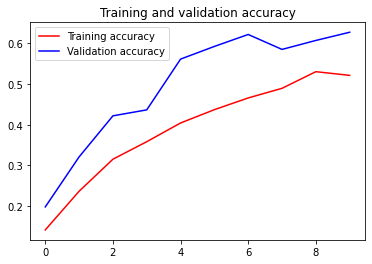

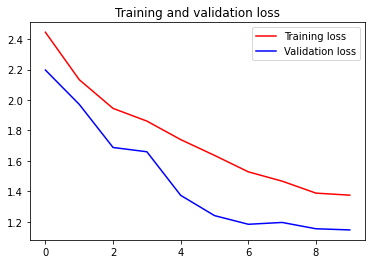

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Train Model with Transfer Learning


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
pretrained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False
    
# Print the model summary
#pretrained_model.summary()

In [ ]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(12, activation='softmax')(x)

In [ ]:
model2 = Model(pretrained_model.input, x)

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_285 (Conv2D)            (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_285[0][0]']             
 Normalization)                 )                                                           

In [ ]:
history = model2.fit(train_generator, 
                     epochs=20, 
                     steps_per_epoch=10, 
                     validation_data=val_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/20
10/10 [==============================] - 13s 973ms/step - loss: 4.1428 - accuracy: 0.2438 - val_loss: 1.5852 - val_accuracy: 0.5312
Epoch 2/20
10/10 [==============================] - 9s 870ms/step - loss: 1.6684 - accuracy: 0.4719 - val_loss: 0.8127 - val_accuracy: 0.6875
Epoch 3/20
10/10 [==============================] - 8s 713ms/step - loss: 1.3104 - accuracy: 0.5344 - val_loss: 0.9222 - val_accuracy: 0.6354
Epoch 4/20
10/10 [==============================] - 6s 603ms/step - loss: 1.0511 - accuracy: 0.6219 - val_loss: 0.8810 - val_accuracy: 0.6562
Epoch 5/20
10/10 [==============================] - 6s 609ms/step - loss: 0.8699 - accuracy: 0.7000 - val_loss: 0.4592 - val_accuracy: 0.8438
Epoch 6/20
10/10 [==============================] - 6s 614ms/step - loss: 0.8276 - accuracy: 0.7281 - val_loss: 0.4617 - val_accuracy: 0.8750
Epoch 7/20
10/10 [==============================] - 6s 581ms/step - loss: 0.7699 - accuracy: 0.7125 - val_loss: 0.5395 - val_accuracy: 0.7812
Epoch

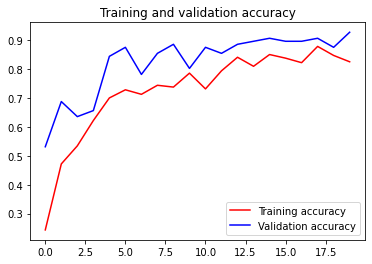

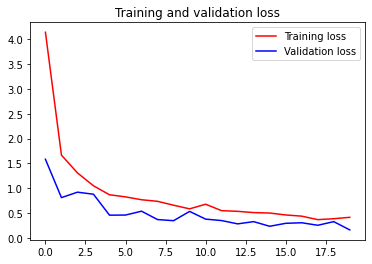

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
loss = model2.evaluate(test_generator, steps=10)

10/10 [==============================] - 1s 51ms/step - loss: 0.2983 - accuracy: 0.9167


Saving keris55.jpg to keris55 (1).jpg
Saving keris64.jpg to keris64 (1).jpg
Saving keris94 - Copy.jpg to keris94 - Copy.jpg


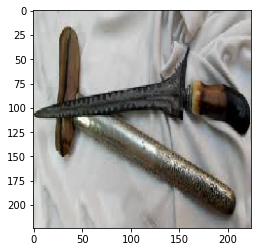

angklung: 0.38%
batik_bali: 0.01%
batik_cendrawasih: 0.05%
blangkon: 2.79%
ganongan: 5.05%
keris: 73.41%
noken: 0.72%
sasando: 10.42%
wayang_bagong: 0.10%
wayang_gareng: 0.01%
wayang_petruk: 0.86%
wayang_semar: 6.20%


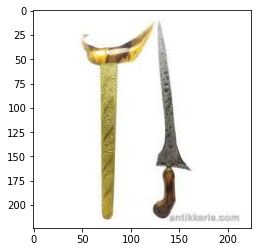

angklung: 0.92%
batik_bali: 0.03%
batik_cendrawasih: 0.03%
blangkon: 0.51%
ganongan: 0.66%
keris: 71.19%
noken: 1.92%
sasando: 14.52%
wayang_bagong: 0.55%
wayang_gareng: 0.10%
wayang_petruk: 9.52%
wayang_semar: 0.06%


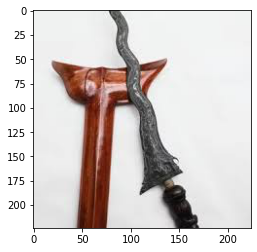

angklung: 0.02%
batik_bali: 0.00%
batik_cendrawasih: 0.00%
blangkon: 0.01%
ganongan: 0.78%
keris: 96.18%
noken: 0.07%
sasando: 0.24%
wayang_bagong: 0.10%
wayang_gareng: 0.06%
wayang_petruk: 2.54%
wayang_semar: 0.01%


In [ ]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model2.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

Saving blangkon40.jpg to blangkon40.jpg
Saving blangkon55 - Copy.jpg to blangkon55 - Copy.jpg
Saving blangkon93 - Copy.jpg to blangkon93 - Copy.jpg


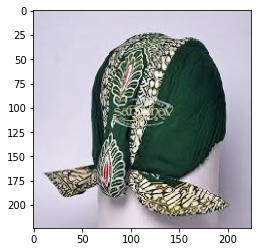

angklung: 0.00%
batik_bali: 0.00%
batik_cendrawasih: 0.14%
blangkon: 97.97%
ganongan: 0.01%
keris: 0.00%
noken: 0.10%
sasando: 0.60%
wayang_bagong: 0.08%
wayang_gareng: 0.00%
wayang_petruk: 0.00%
wayang_semar: 1.10%


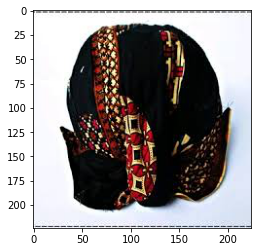

angklung: 0.00%
batik_bali: 0.01%
batik_cendrawasih: 0.80%
blangkon: 82.88%
ganongan: 0.06%
keris: 0.03%
noken: 0.06%
sasando: 1.11%
wayang_bagong: 0.52%
wayang_gareng: 0.00%
wayang_petruk: 0.00%
wayang_semar: 14.51%


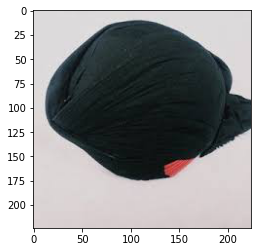

angklung: 0.00%
batik_bali: 0.00%
batik_cendrawasih: 0.00%
blangkon: 99.71%
ganongan: 0.02%
keris: 0.00%
noken: 0.04%
sasando: 0.20%
wayang_bagong: 0.00%
wayang_gareng: 0.00%
wayang_petruk: 0.00%
wayang_semar: 0.02%


In [ ]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model2.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

Saving batik bali (86).jpg to batik bali (86).jpg
Saving batik bali (145).jpg to batik bali (145).jpg
Saving batik bali (167).jpg to batik bali (167).jpg


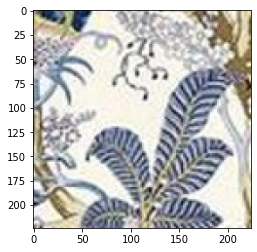

angklung: 0.00%
batik_bali: 89.26%
batik_cendrawasih: 10.63%
blangkon: 0.08%
ganongan: 0.00%
keris: 0.00%
noken: 0.00%
sasando: 0.00%
wayang_bagong: 0.00%
wayang_gareng: 0.00%
wayang_petruk: 0.00%
wayang_semar: 0.03%


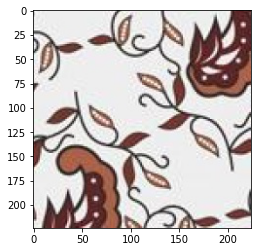

angklung: 0.00%
batik_bali: 99.92%
batik_cendrawasih: 0.04%
blangkon: 0.00%
ganongan: 0.00%
keris: 0.00%
noken: 0.00%
sasando: 0.00%
wayang_bagong: 0.00%
wayang_gareng: 0.04%
wayang_petruk: 0.00%
wayang_semar: 0.00%


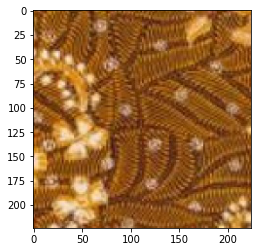

angklung: 0.00%
batik_bali: 5.36%
batik_cendrawasih: 94.51%
blangkon: 0.05%
ganongan: 0.00%
keris: 0.00%
noken: 0.08%
sasando: 0.00%
wayang_bagong: 0.00%
wayang_gareng: 0.00%
wayang_petruk: 0.00%
wayang_semar: 0.00%


In [ ]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model2.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

# Save the model

In [ ]:
saved_model_path = '/content/drive/MyDrive/Bangkit/artnesia/modelling/best_model.h5'

# Save model h5
model2.save(saved_model_path)

Convert the model to TfLite


In [ ]:
ls

ArtnesiaTfLiteModelling.ipynb  best_model.h5  dataset/  test/  train/  val/


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('best_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("artnesia.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpf7pli8kk/assets


247055736

In [ ]:
import tensorflow as tf
model = tf.keras.model.load_model('best_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open("artnesia_compressed.tflite", "wb").write(tflite_quant_model)
